In [18]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import cv2
from PIL import Image
import csv
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [19]:
dataDir='..'
dataTypeVal='val2014'
annFileVal='{}/annotations/instances_{}.json'.format(dataDir,dataTypeVal)
dataTypeTrain='train2014'
annFileTrain='{}/annotations/instances_{}.json'.format(dataDir,dataTypeTrain)

In [20]:
# initialize COCO api for instance annotations
cocoVal=COCO(annFileVal)
cocoTrain=COCO(annFileTrain)

loading annotations into memory...
Done (t=8.35s)
creating index...
index created!
loading annotations into memory...
Done (t=16.09s)
creating index...
index created!


In [12]:



category_list = [1,3,5,16,18,22,23,24,48,49,51,53,62,67]
for i in category_list:
    imgIdTrain = cocoTrain.getImgIds(catIds=i)
    print(len(imgIdTrain))
    print

45174

8606

2243

2241

3041

1518

668

1324

2537

3097

5028

1171

8950

8378



In [21]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image

file_list = []
with open('benchmark_images.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        file_list.append([row[0],row[2].split('_')[1],row[2]])


In [16]:
print()

()


In [22]:

countV = 0
countT = 0
counter = 0
itera = 0
for i in file_list:
    try:
        if i[1] == 'train2014':
            try:
                imgIdTrain = cocoTrain.getImgIds(int(i[0]))
                imgTrain = cocoTrain.loadImgs(imgIdTrain)[0]
                I = io.imread(imgTrain['coco_url'])
                annIds = cocoTrain.getAnnIds(imgIds=imgTrain['id'])
                anns = cocoTrain.loadAnns(annIds)
                number_of_masks =  min(len(anns),3)
                masks = [[]*number_of_masks]
                for j in range(number_of_masks):
                    masks[j] = cocoTrain.annToMask(anns[j])
            except:
                countT = countT + 1
        else:
            try:
                imgIdVal = cocoVal.getImgIds(int(i[0]))
                imgVal = cocoVal.loadImgs(imgIdVal)[0]
                I = io.imread(imgVal['coco_url'])
                annIds = cocoVal.getAnnIds(imgIds=imgVal['id'])
                anns = cocoVal.loadAnns(annIds)
                number_of_masks =  min(len(anns),3)
                masks = [[]*number_of_masks]
                for j in range(number_of_masks):
                    masks[j] = cocoVal.annToMask(anns[j])
            except:
                countV = countV + 1    
                
        for m in range(number_of_masks):
            for r in range(masks[m].shape[0]):
                for c in range(masks[m].shape[1]):
                    if mask[r][c] == 0:
                        I[r][c] = (0,0,0)
            im = Image.fromarray(I)
            file_string = "maskBlack"+str(m)+"_"+str(i[2])
            im.save(file_string)
    except:
        counter = counter + 1
print countT
print countV
print counter

1296
1504
2800


In [ ]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'])
anns = coco.loadAnns(annIds)
#coco.showAnns(anns)
mask = coco.annToMask(anns[0])
plt.imshow(mask)

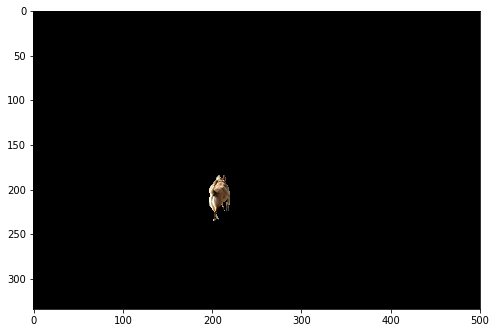

In [84]:
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i][j] == 0:
            I[i][j] = (0,0,0)
            
plt.imshow(I)
im = Image.fromarray(I)
im.save("master.jpeg")

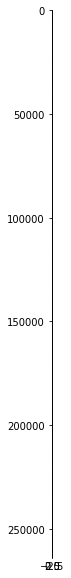